![Big Data University](https://ibm.box.com/shared/static/jvcqp2iy2jlx2b32rmzdt0tx8lvxgzkp.png)

# <center> "Hello World" in TensorFlow  - Exercise Notebook</center>

#### Before everything, let's import the TensorFlow library

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt

### First, try to add the two constants and print the result.

In [2]:
a = tf.constant([5])
b = tf.constant([2])

create another TensorFlow object applying the sum (+) operation:

In [3]:
#Your code goes here
c = a + b

<div align="right">
<a href="#sum1" class="btn btn-default" data-toggle="collapse">Click here for the solution #1</a>
<a href="#sum2" class="btn btn-default" data-toggle="collapse">Click here for the solution #2</a>
</div>
<div id="sum1" class="collapse">
```
c=a+b
```
</div>
<div id="sum2" class="collapse">
```
c=tf.add(a,b)
```
</div>

In [5]:
with tf.Session() as session:
    result = session.run(c)
    print("The addition of this two constants is: {0}".format(result))

The addition of this two constants is: [7]


---
### Now let's try to multiply them.

In [6]:
# Your code goes here. Use the multiplication operator.
c = a * b

<div align="right">
<a href="#mult1" class="btn btn-default" data-toggle="collapse">Click here for the solution #1</a>
<a href="#mult2" class="btn btn-default" data-toggle="collapse">Click here for the solution #2</a>
</div>
<div id="mult1" class="collapse">
```
c=a*b
```
</div>
<div id="mult2" class="collapse">
```
c=tf.multiply(a,b)
```
</div>

In [9]:
with tf.Session() as session:
    result = session.run(c)
    print("The Multiplication of this two constants is: {0}".format(result))

The Multiplication of this two constants is: [10]


### Multiplication: element-wise or matrix multiplication

Let's practice the different ways to multiply matrices:
- **Element-wise** multiplication in the **first operation** ;
- **Matrix multiplication** on the **second operation**  ;

In [10]:
matrixA = tf.constant([[2,3],[3,4]])
matrixB = tf.constant([[2,3],[3,4]])

In [11]:
# Your code goes here
first_operation = matrixA * matrixB
second_operation = tf.matmul(matrixA, matrixB)

<div align="right">
<a href="#matmul1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="matmul1" class="collapse">
```
first_operation=tf.multiply(matrixA, matrixB)
second_operation=tf.matmul(matrixA,matrixB)
```
</div>

In [13]:
with tf.Session() as session:
    result = session.run(first_operation)
    print("Element-wise multiplication: \n", result)

    result = session.run(second_operation)
    print("Matrix Multiplication: \n", result)

Element-wise multiplication: 
 [[ 4  9]
 [ 9 16]]
Matrix Multiplication: 
 [[13 18]
 [18 25]]


---
### Modify the value of variable b to the value in constant a: 

In [14]:
a=tf.constant(1000)
b=tf.Variable(0)
init_op = tf.global_variables_initializer()

In [15]:
# Your code goes here
update = tf.assign(b, a)
with tf.Session() as session:
    session.run(init_op)
    session.run(update)
    print(b.eval())

1000


<div align="right">
<a href="#assign" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="assign" class="collapse">
```
a=tf.constant(1000)
b=tf.Variable(0)
init_op = tf.global_variables_initializer()
update = tf.assign(b,a)
with tf.Session() as session:
    session.run(init_op) 
    session.run(update) 
    print(session.run(b))
```
</div>

---
### Fibonacci sequence

Now try to do something more advanced. Try to create a __fibonnacci sequence__ and print the first few values using TensorFlow:</b></h3>

If you don't know, the fibonnacci sequence is defined by the equation: <br><br>
$$F_{n} = F_{n-1} + F_{n-2}$$<br>
Resulting in a sequence like: 1,1,2,3,5,8,13,21...




1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269
2178309
3524578
5702887
9227465
14930352
24157817
39088169
63245986
102334155
165580141


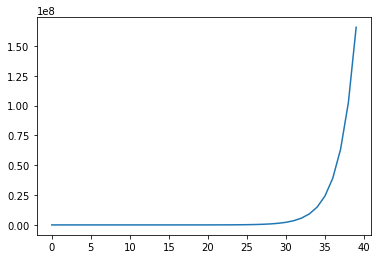

In [16]:
# Variables
val_prev = tf.Variable(0)
val_curr = tf.Variable(1)
val_new = tf.Variable(0)
fib_op = val_curr + val_prev

# Update operations
update_new_op = tf.assign(val_new, fib_op)
update_prev_op = tf.assign(val_prev, val_curr)
update_curr_op = tf.assign(val_curr, val_new)

init_op = tf.global_variables_initializer()
num_iterations = 40
fibonacci = []

with tf.Session() as session:
    # Init
    session.run(init_op)
    print(val_curr.eval())
    
    # Iterate
    for it in range(num_iterations):        
        # Update current and previous values
        session.run(update_new_op)
        session.run(update_prev_op)
        session.run(update_curr_op)
        fib_val = val_curr.eval()
        print(fib_val)
        fibonacci.append(fib_val)
        
plt.plot(fibonacci)

<div align="right">
<a href="#fibonacci-solution" class="btn btn-default" data-toggle="collapse">Click here for the solution #1</a>
<a href="#fibonacci-solution2" class="btn btn-default" data-toggle="collapse">Click here for the solution #2</a>
</div>


<div id="fibonacci-solution" class="collapse">
```
a=tf.Variable(0)
b=tf.Variable(1)
temp=tf.Variable(0)
c=a+b

update1=tf.assign(temp,c)
update2=tf.assign(a,b)
update3=tf.assign(b,temp)

init_op = tf.initialize_all_variables()
with tf.Session() as s:
	s.run(init_op)
	for _ in range(15):
		print(s.run(a))
		s.run(update1)
		s.run(update2)
		s.run(update3)
```
</div>


<div id="fibonacci-solution2" class="collapse">
```
f = [tf.constant(1),tf.constant(1)]

for i in range(2,10):
	temp = f[i-1] + f[i-2]
	f.append(temp)

with tf.Session() as sess:
	result = sess.run(f)
	print result
```
</div>

---

### Now try to create your own placeholders and define any kind of operation between them:



In [17]:
# Your code goes here
a = tf.placeholder(name='a', dtype=tf.float32)
b = tf.placeholder(name='b', dtype=tf.float32)
my_op = tf.maximum(a, b)

with tf.Session() as session:
    val = session.run(my_op, feed_dict={a: [125], b: [2.]})
    print(val)

[ 125.]


<div align="right">
<a href="#placeholder" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>


<div id="placeholder" class="collapse">
```

a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)

c=2*a -b

dictionary = {a:[2,2],b:[3,4]}
with tf.Session() as session:
	print session.run(c,feed_dict=dictionary)
```
</div>

### Try changing our example with some other operations and see the result.

<div class="alert alert-info alertinfo">
<font size = 3><strong>Some examples of functions:</strong></font>  
<br>
tf.multiply(x, y)<br />
tf.div(x, y)<br />
tf.square(x)<br />
tf.sqrt(x)<br />
tf.pow(x, y)<br />
tf.exp(x)<br />
tf.log(x)<br />
tf.cos(x)<br />
tf.sin(x)<br /> <br>

You can also take a look at [more operations]( https://www.tensorflow.org/versions/r0.9/api_docs/python/math_ops.html)
</div>

In [18]:
a = tf.constant(5.)
b = tf.constant(2.)

create a variable named **`c`** to receive the result an operation (at your choice):

In [19]:
#your code goes here

c = tf.sin(a) * tf.exp(b)


<div align="right">
<a href="#operations" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>


<div id="operations" class="collapse">
```
c=tf.sin(a)
```
</div>

In [21]:
with tf.Session() as session:
    result = session.run(c)
    print("c =: {}".format(result))

c =: -7.085545539855957


They're really similar to mathematical functions the only difference is that operations works over tensors.

### Thanks for completing this lesson!